In [24]:
import json, cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from utils import plot_images
from val import FisheyeDetectionValidator

In [18]:
image_dir = "/workspace/FishEye8k/dataset/Fisheye8K_all_including_train/test/images/"

In [19]:
gt_dir = "/workspace/FishEye8k/dataset/Fisheye8K_all_including_train/test/test.json"
with open(gt_dir)   as f: gts   = json.load(f)
gt_img, gt_ann = gts["images"], gts["annotations"]

## InternImage

In [20]:
pred_dir = "results/internimage_eval_fisheye_128.json"
with open(pred_dir) as f: preds = json.load(f)
# get all image_id from the predicitons
img_ids = []
for pred in preds:
  if not pred["image_id"] in img_ids: 
    img_ids.append(pred["image_id"])

In [ ]:
idx = img_ids[20]

In [ ]:
filename = [g["file_name"] for g in gt_img if g["id"] == idx]
print(filename[0])
img = cv2.imread(image_dir + filename[0])

# get ground truth
cls = np.array([gt["category_id"] for gt in gt_ann if gt["image_id"] == idx])
bboxes = np.array([gt["bbox"] for gt in gt_ann if gt["image_id"] == idx])
names = {0: 'bus', 1: 'motorcycle', 2: 'car', 3: 'person', 4: 'truck'}

img_gt = plot_images(img, cls, bboxes, None, names, plot=False)

# get predictions
cls = np.array([pred["category_id"] for pred in preds if pred["image_id"] == idx])
bboxes = np.array([pred["bbox"] for pred in preds if pred["image_id"] == idx])
confs = np.array([pred["score"] for pred in preds if pred["image_id"] == idx])
names = {0: 'person', 2: 'car', 3: 'motorcycle', 5: 'bus', 7: 'truck'}
img_pred = plot_images(img, cls, bboxes, confs, names, plot=False)

camera4_E_237.png


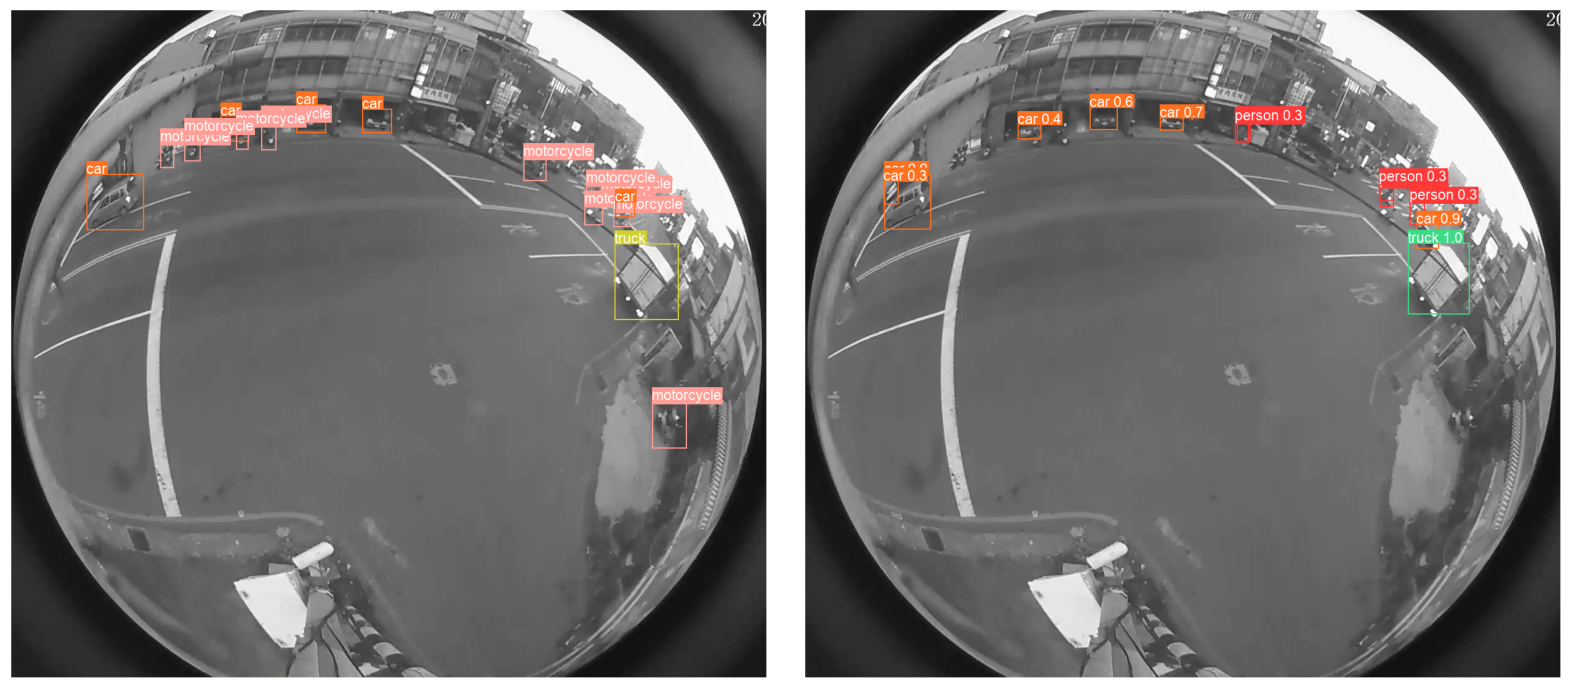

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(20, 12))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(img_gt)
ax[0].axis('off')
ax[1].imshow(img_pred)
ax[1].axis('off')
plt.gcf().set_facecolor('none')
plt.show()

In [26]:
# only reason this is needed was because model trained with coco marked the class with different category id
class_name = {0: 'bus', 1: 'motorcycle', 2: 'car', 3: 'person', 4: 'truck'}
fisheye_eval = FisheyeDetectionValidator()
fisheye_eval.init_metrics(class_name)